### Name: UNIQUE ADHIKARI
### Intern ID: IN9240315

In [42]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [43]:
data= pd.read_csv("dataset.csv")

In [44]:
data.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602


In [45]:
data.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                            int64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

## Task 1

### Univariate Analysis

#### Numerical Columns

In [46]:
# List out the numerical columns as a different dataset

numerical= data.select_dtypes(include= ['int64', 'float64'])

numerical.head()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
0,33040,2022,42,0,NaN,198968248,12087972100
1,89029,2013,38,0,NaN,5204412,32003005702
2,98901,2011,73,0,15.0,218972519,53077001602
3,98237,2017,238,0,39.0,186750406,53057951101
4,98201,2019,26,0,38.0,2006714,53061041500


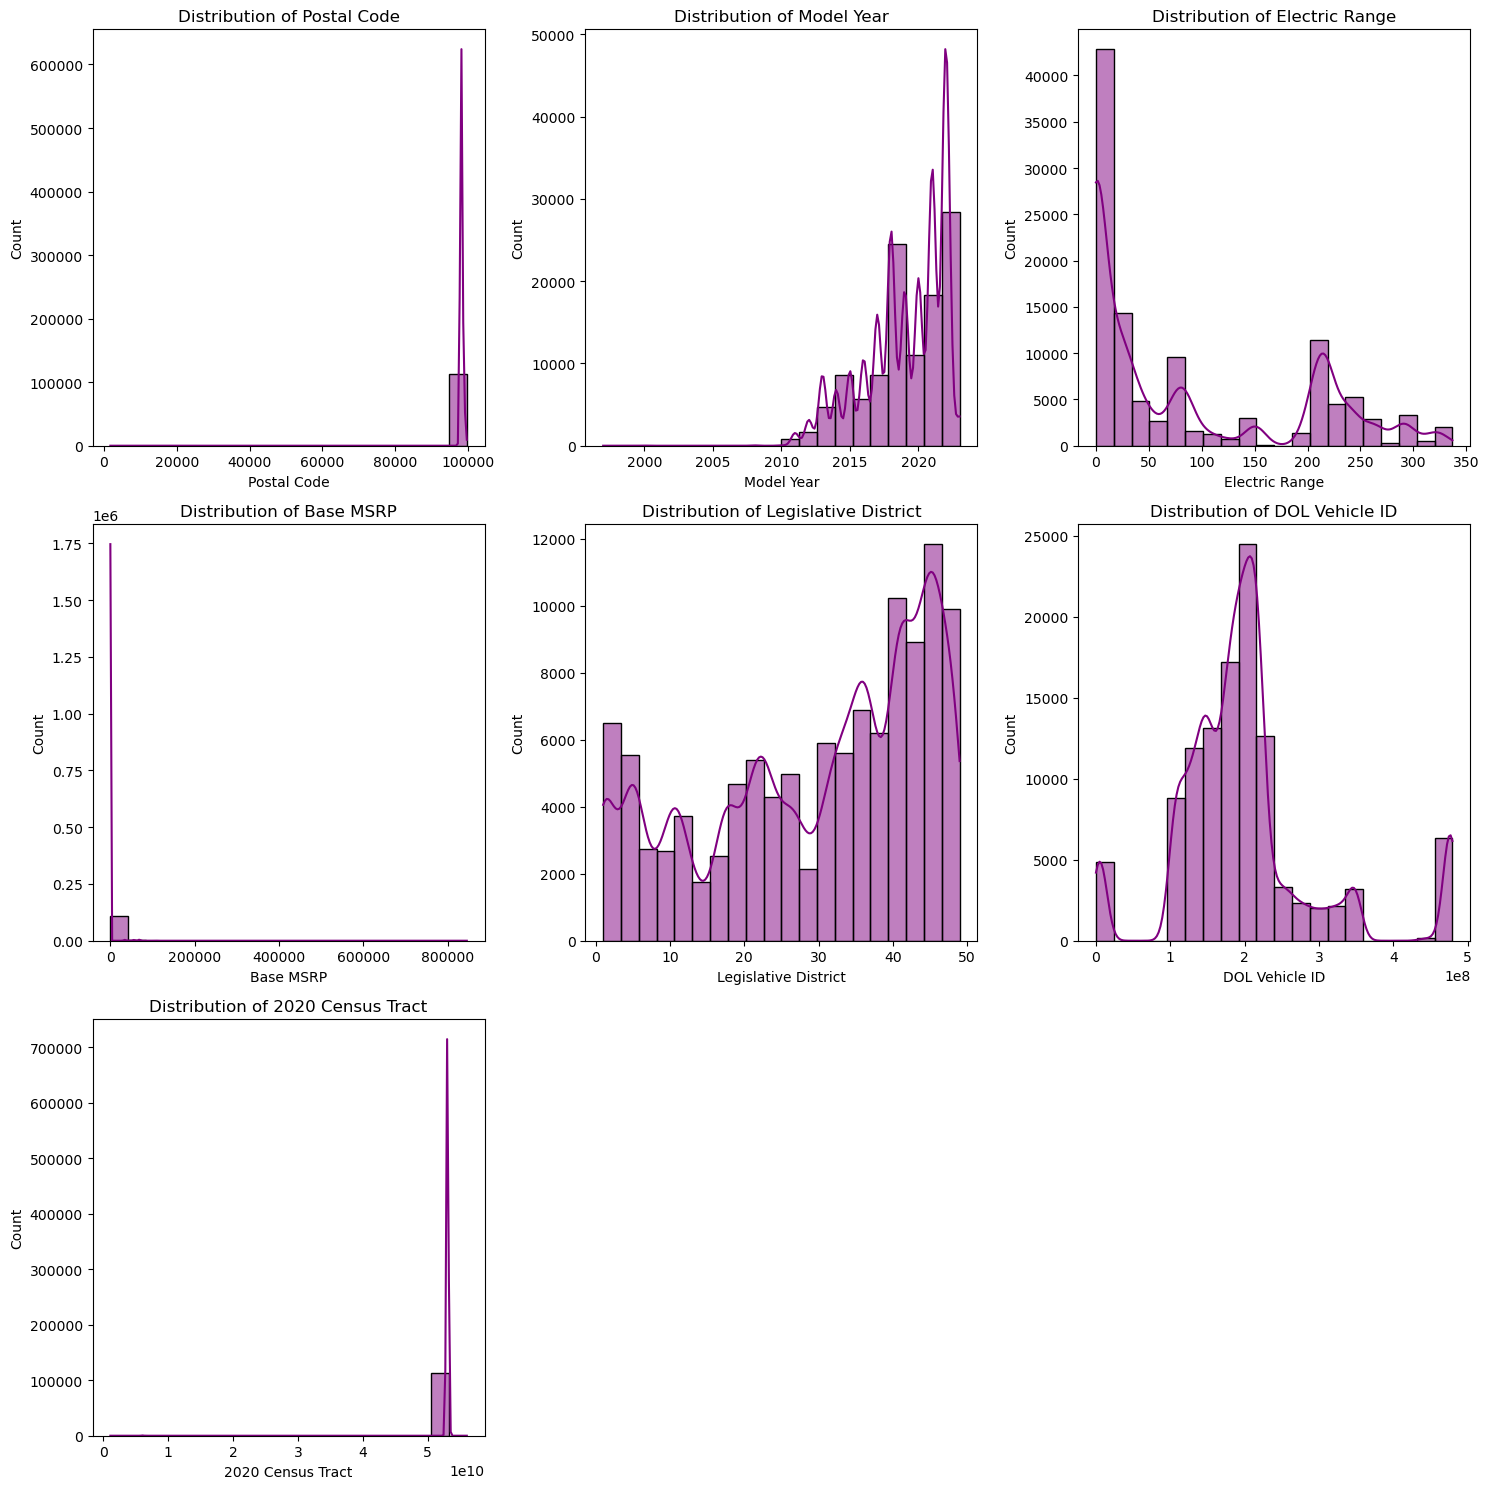

In [47]:
# Displaying all subplot in single figure

num_cols= len(numerical.columns)

fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(15, 5 * ((num_cols // 3) + 1)))

for i, col in enumerate(numerical.columns):

    sns.histplot(numerical[col], bins=20, kde=True, color='purple', ax=axes.flatten()[i])
    
    axes.flatten()[i].set_title(f'Distribution of {col}')

# Removing empty and unused subplots
for j in range(i + 1, len(axes.flatten())):

    fig.delaxes(axes.flatten()[j])

plt.tight_layout()

plt.show()

#### Categorical Columns

In [48]:
# List out the categorical columns as a different dataset

categorical = data.select_dtypes(include=['object'])

categorical.head()

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
0,JTMEB3FV6N,Monroe,Key West,FL,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,POINT (-81.80023 24.5545),NaN
1,1G1RD6E45D,Clark,Laughlin,NV,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,POINT (-114.57245 35.16815),NaN
2,JN1AZ0CP8B,Yakima,Yakima,WA,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-120.50721 46.60448),PACIFICORP
3,1G1FW6S08H,Skagit,Concrete,WA,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC
4,3FA6P0SU1K,Snohomish,Everett,WA,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC


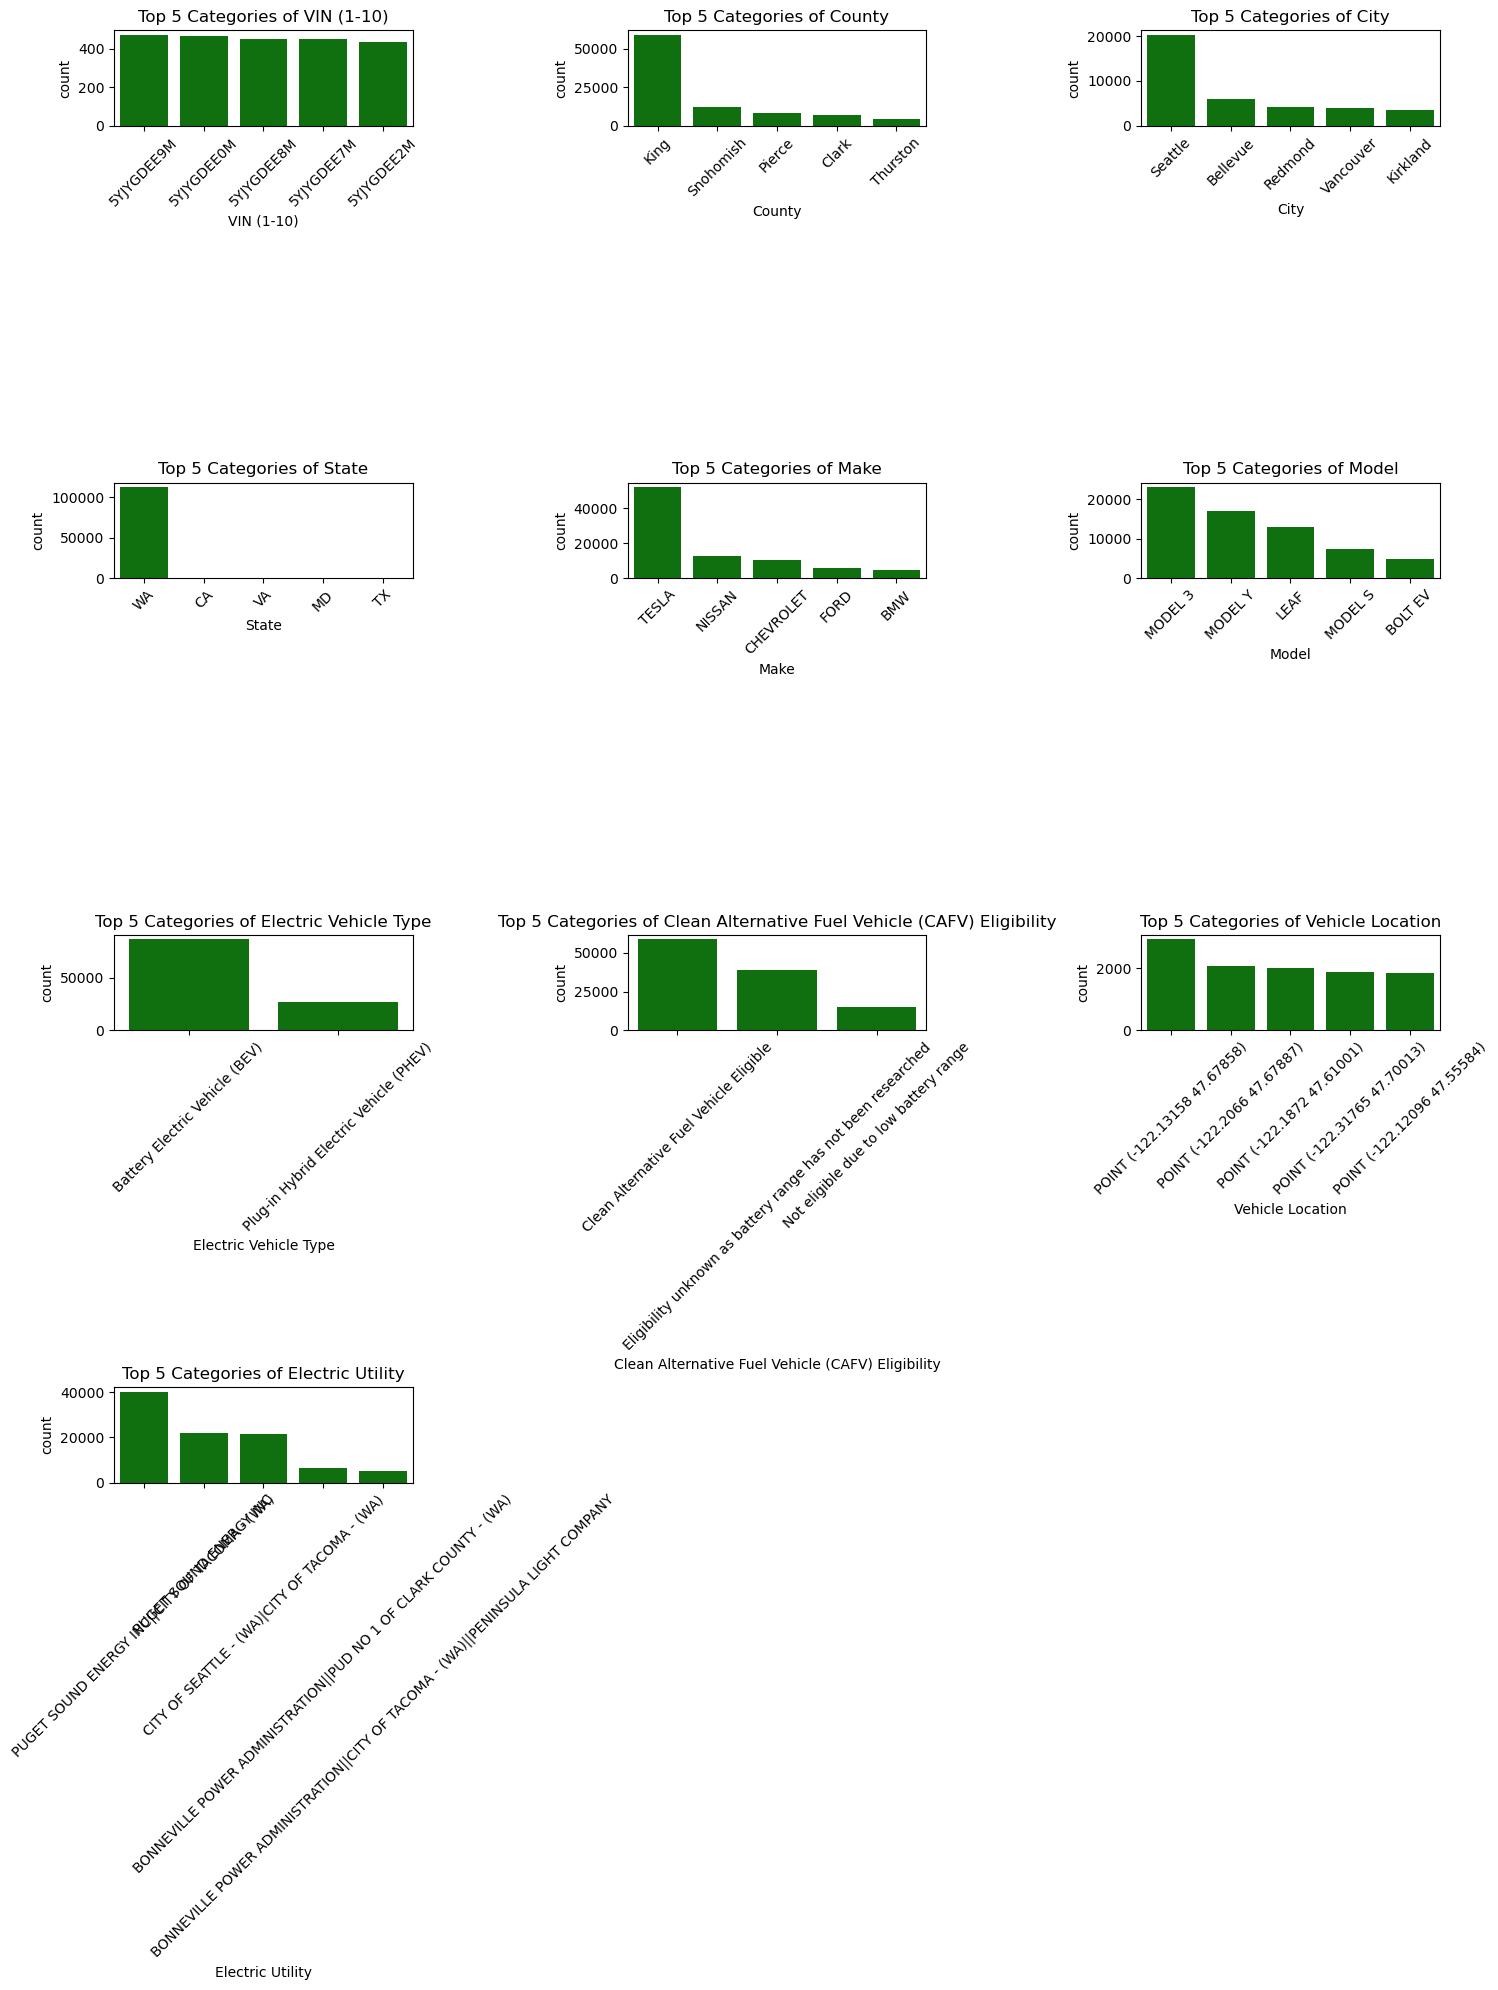

In [49]:
# Displaying all subplots

cat_cols = len(categorical.columns)

fig, axes = plt.subplots(nrows=(cat_cols // 3) + 1, ncols=3, figsize=(15, 5 * ((cat_cols // 3) + 1)))

for i, col in enumerate(categorical.columns):

    top_5_categories = categorical[col].value_counts().nlargest(5).index
    
    filtered_data = categorical[categorical[col].isin(top_5_categories)]
    
    sns.countplot(data=filtered_data, x=col, ax=axes.flatten()[i], order=top_5_categories, color='green')
    
    axes.flatten()[i].set_title(f'Top 5 Categories of {col}')

    axes.flatten()[i].tick_params(axis='x', rotation=45)

# Removing empty and unused subplots

for j in range(i + 1, len(axes.flatten())):

    fig.delaxes(axes.flatten()[j])

plt.tight_layout()

plt.show()

In [50]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


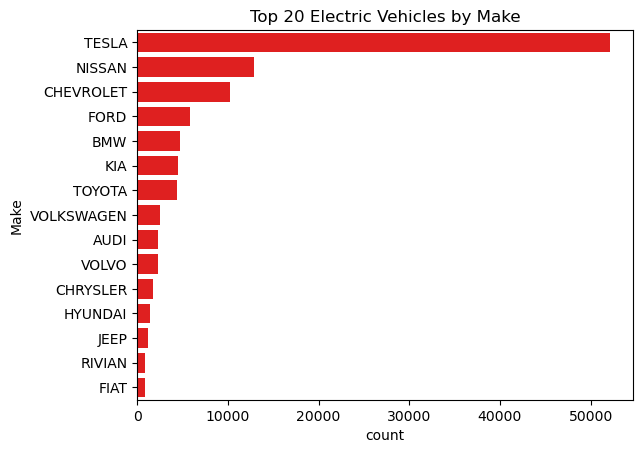

In [51]:
top_15_makes = data['Make'].value_counts().nlargest(15).index

filtered_data = data[data['Make'].isin(top_15_makes)]

sns.countplot(y='Make', data=filtered_data, order=top_15_makes, color='red')

plt.title('Top 20 Electric Vehicles by Make')

plt.show()

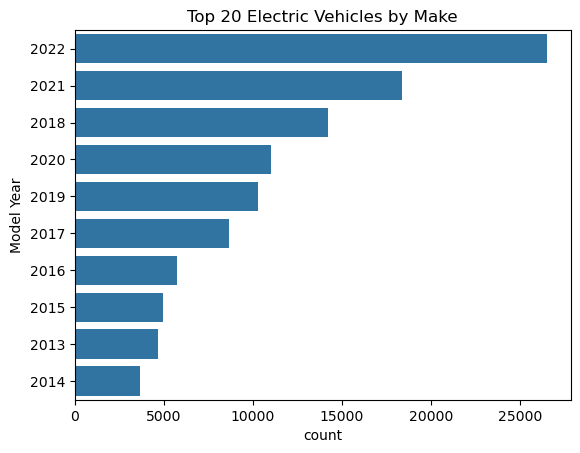

In [52]:
top_10_year = data['Model Year'].value_counts().nlargest(10).index

filtered_data = data[data['Model Year'].isin(top_10_year)]

sns.countplot(y='Model Year', data=filtered_data, order=top_10_year)

plt.title('Top 20 Electric Vehicles by Make')

plt.show()

### Bivariate Analysis

#### Numerical-Numerical Relationship

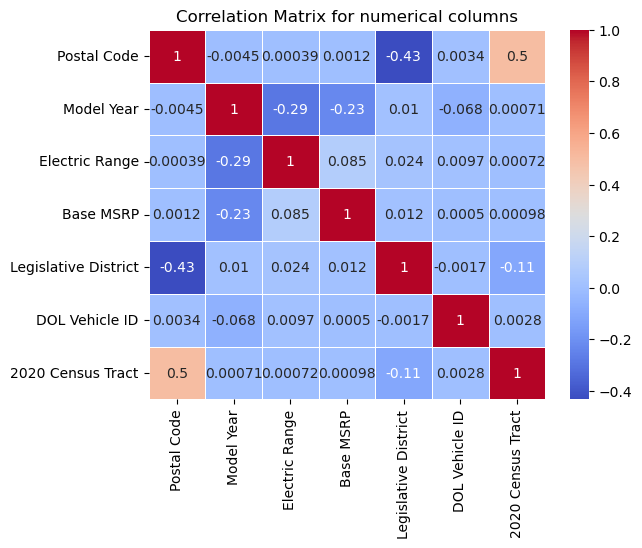

In [53]:
sns.heatmap(numerical.corr(), annot=True, cmap='coolwarm', linewidths=0.5).set_title('Correlation Matrix for numerical columns')

plt.show()

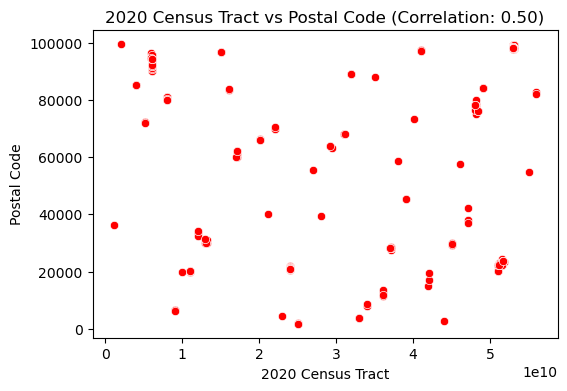

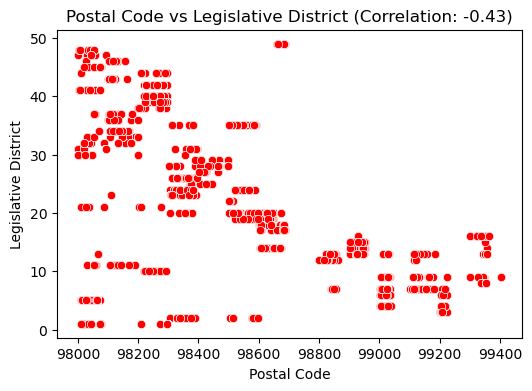

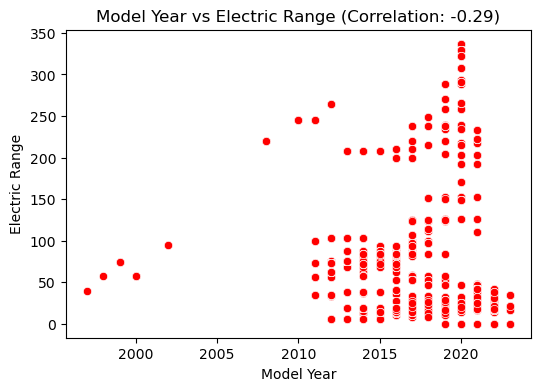

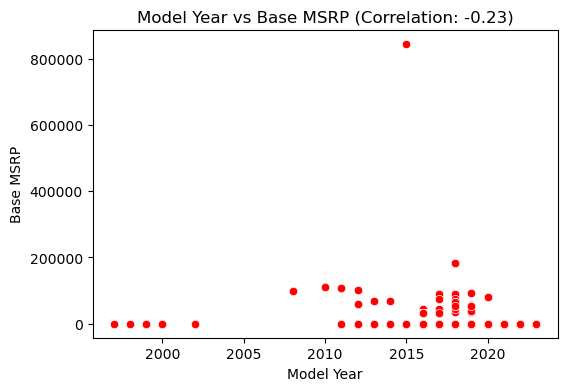

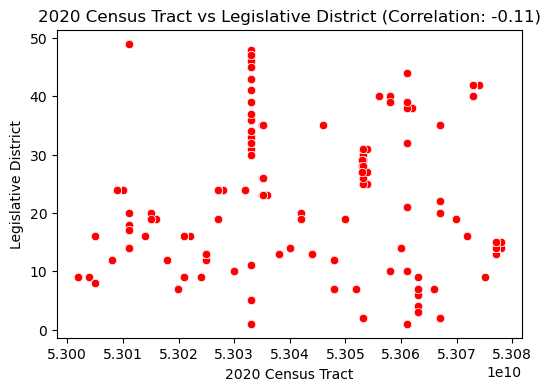

In [54]:
threshold = 0.1

correlation_matrix = numerical.corr()

high_corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates()

high_corr_pairs = high_corr_pairs[high_corr_pairs > threshold]

for col1, col2 in high_corr_pairs.index:

    if col1 != col2:

        plt.figure(figsize=(6, 4))

        sns.scatterplot(data=numerical, x=col1, y=col2, color='red')

        plt.title(f'{col1} vs {col2} (Correlation: {correlation_matrix[col1][col2]:.2f})')
        
        plt.show()

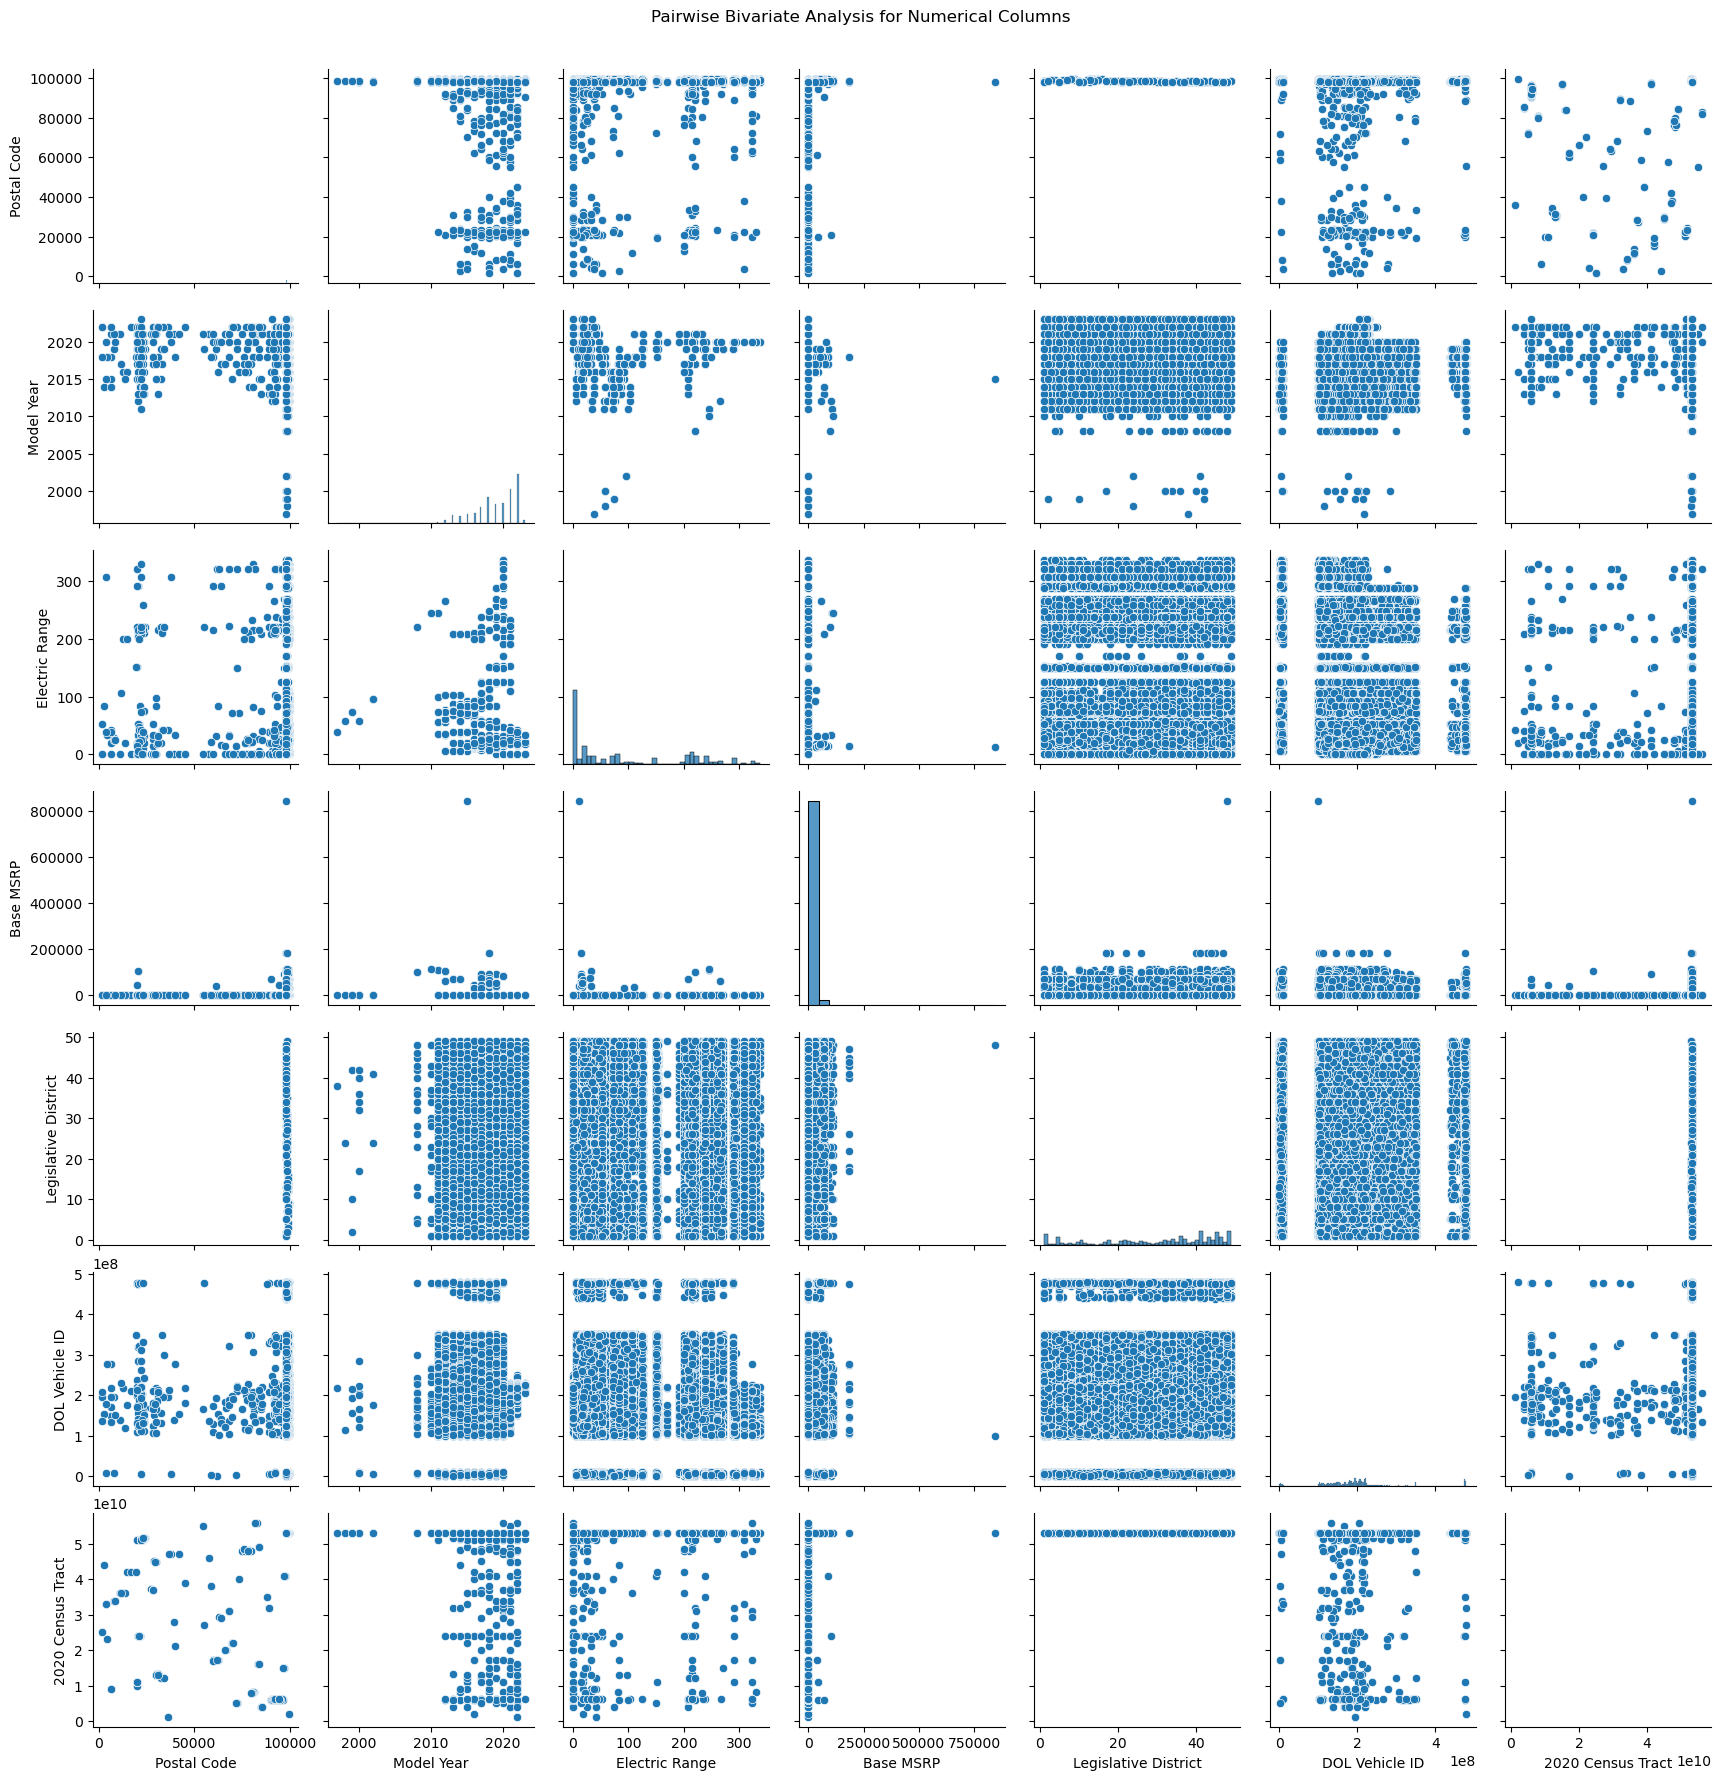

In [55]:
# Pairplot analysis for numerical-numerical relationship

sns.pairplot(numerical)

plt.suptitle('Pairwise Bivariate Analysis for Numerical Columns', y=1.02)

plt.show()

#### Categorical-Numerical Relationship

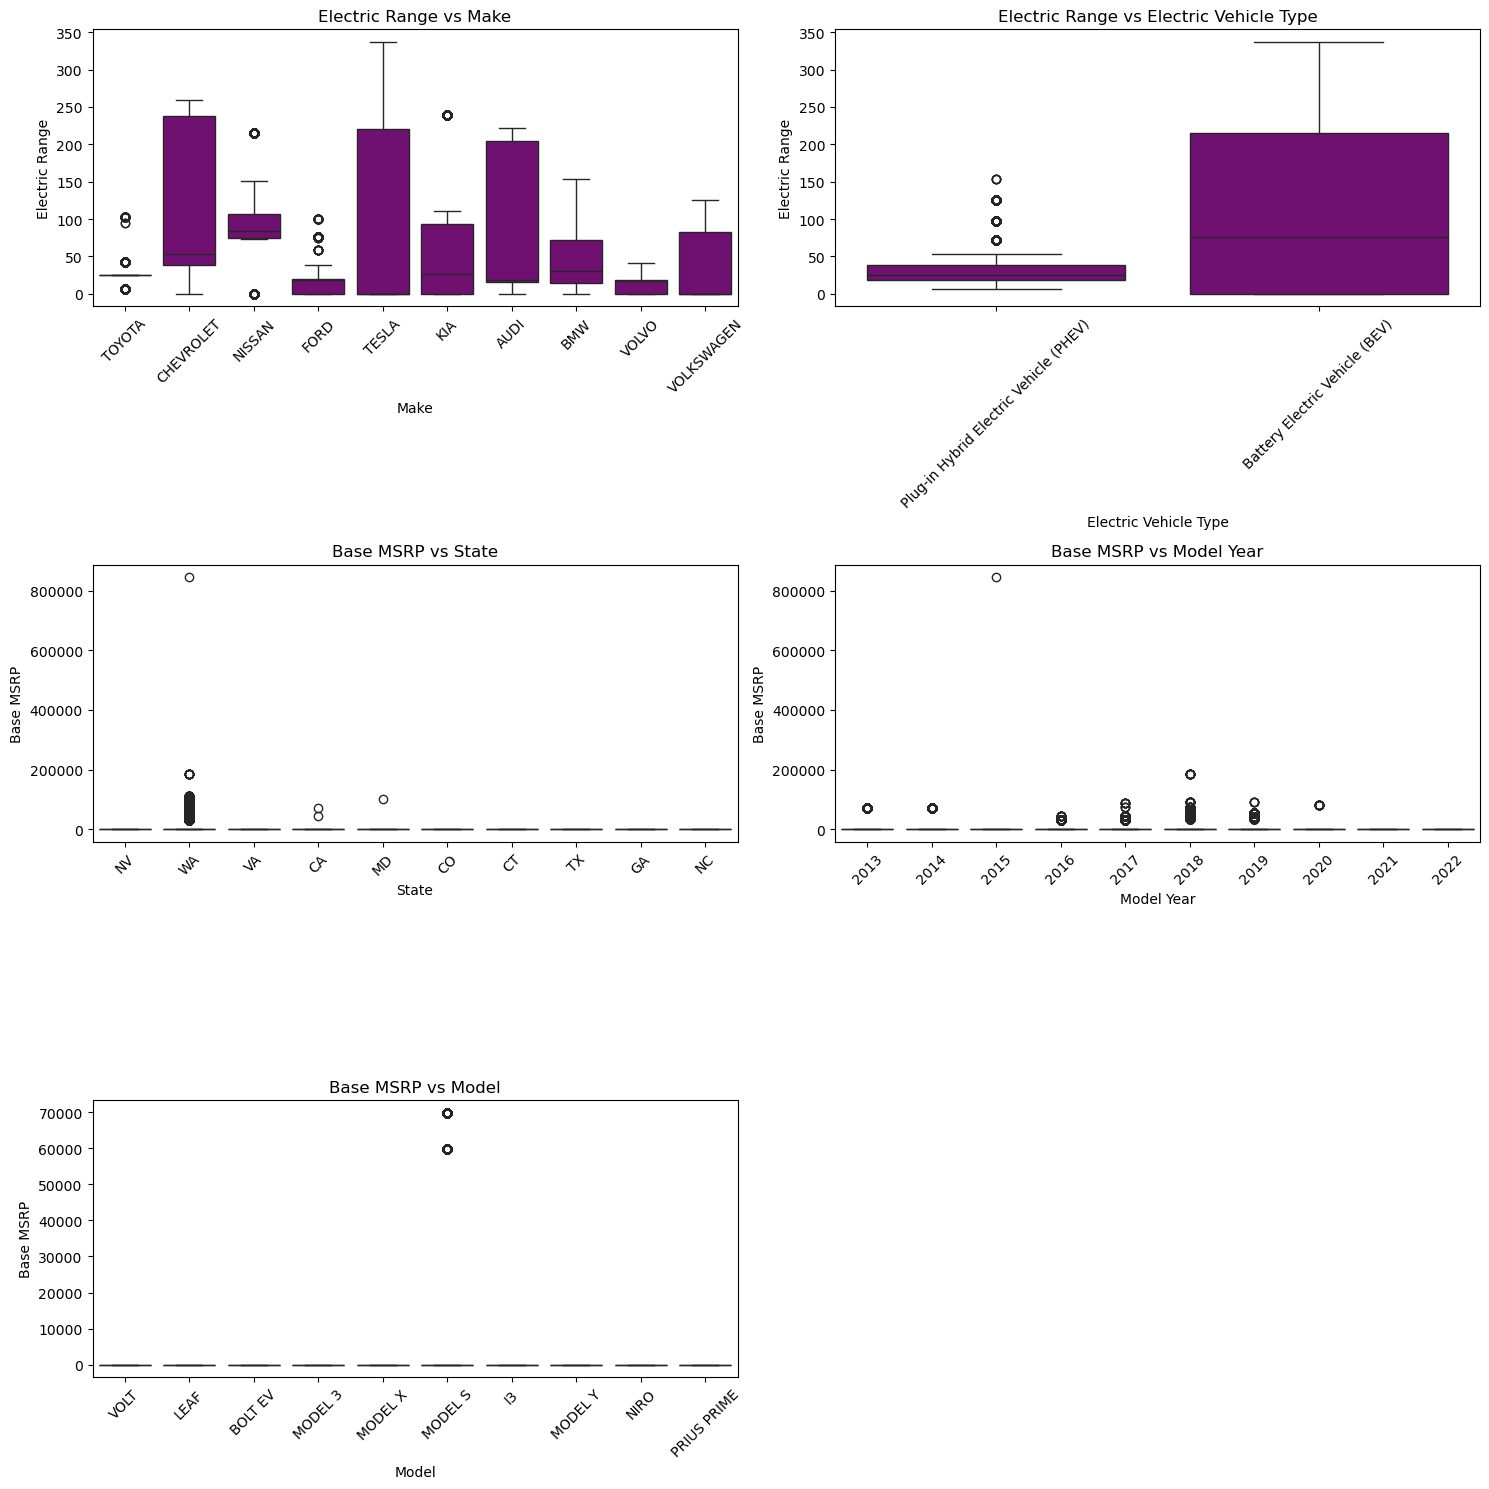

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

related_pairs = [ ('Make', 'Electric Range'), ('Electric Vehicle Type', 'Electric Range'), ('State', 'Base MSRP'), ('Model Year', 'Base MSRP'), ('Model', 'Base MSRP')]

num_plots = len(related_pairs)

fig, axes = plt.subplots(nrows=(num_plots // 2) + 1, ncols=2, figsize=(15, 5 * ((num_plots // 2) + 1)))

for i, (cat_col, num_col) in enumerate(related_pairs):

    top_categories = data[cat_col].value_counts().nlargest(10).index

    filtered_data = data[data[cat_col].isin(top_categories)]
    
    sns.boxplot(x=cat_col, y=num_col, data=filtered_data, ax=axes.flatten()[i], color='purple')

    axes.flatten()[i].set_title(f'{num_col} vs {cat_col}', fontsize=12)

    axes.flatten()[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes.flatten())):

    fig.delaxes(axes.flatten()[j])

plt.tight_layout()

plt.show()

## Task 2

In [57]:
state_ev_counts = data.groupby('State').size().reset_index(name='EV Count')

fig = px.choropleth(state_ev_counts, locations='State', locationmode='USA-states', color='EV Count', scope='usa',title='Number of EVs by State')

fig.show()

## Task 3

In [60]:
make_year_data = data.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

all_years = make_year_data['Model Year'].unique()

all_makes = make_year_data['Make'].unique()

full_index = pd.MultiIndex.from_product([all_years, all_makes], names=['Model Year', 'Make'])

make_year_data = make_year_data.set_index(['Model Year', 'Make']).reindex(full_index, fill_value=0).reset_index()

fig = px.bar( make_year_data, x='Count', y='Make', color='Make', animation_frame='Model Year', orientation='h', title='Racing Bar Plot of EV Makes by Model Year', labels={'Count': 'Number of Vehicles'}, height=600)

fig.update_layout( xaxis_title='Number of Vehicles', yaxis_title='EV Make', title={'x': 0.5}, template='plotly_dark')

fig.show()
